#Set up

In [35]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
#Installing Kaggle to get access to data
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#Api token to get access to kaggle datasets
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"arturogranados","key":"55059be5f146d7c79b57678f7c5d7d6e"}'}

In [38]:
#Directory
!pwd

/content


In [39]:
#Directory configuration
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [40]:
#Download the dataset
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
#Function to extrac files from a .zip file
from zipfile import ZipFile 

def open_zipfile(file_name):
  with ZipFile(file_name, 'r') as zip:
    
    zip.printdir()
    zip.extractall()

In [42]:
#Applyinf open_zipfile to get the csv file
open_zipfile('new-york-city-airbnb-open-data.zip')

File Name                                             Modified             Size
AB_NYC_2019.csv                                2019-10-27 22:06:18      7077973
New_York_City_.png                             2019-10-27 22:06:20       192340


#Dataset

We'll keep working with the 'price' variable, and we'll transform it to a classification task.

In [43]:
#Reading the csv file with pandas
dataset = pd.read_csv('AB_NYC_2019.csv')

#Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two 'neighbourhood_group' and 'room_type'. So the whole feature set will be set as follows:

* 'neighbourhood_group',
* 'room_type',
* 'latitude',
* 'longitude',
* 'price',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365'

Select only them and fill in the missing values with 0.

In [44]:
#Important features list
important_features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']
#Important columns selection
dataset = dataset[important_features]

In [45]:
#Fill in the missing values with 0.
dataset.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [46]:
#Fill in the missing values with 0.
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(value = 0)

#Question 1
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [47]:
#'neighbourhood_group' column mode
dataset['neighbourhood_group'].mode()

0    Manhattan
dtype: object

#Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [48]:
#split data into X and y variables 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [49]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42, shuffle= True)
X_test, X_validation, y_test, y_validataion = train_test_split(X_test, y_test, test_size=.50, random_state=42, shuffle= True)

#Question 2
* Create the correlation matrix for the numerical features of your train dataset.
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

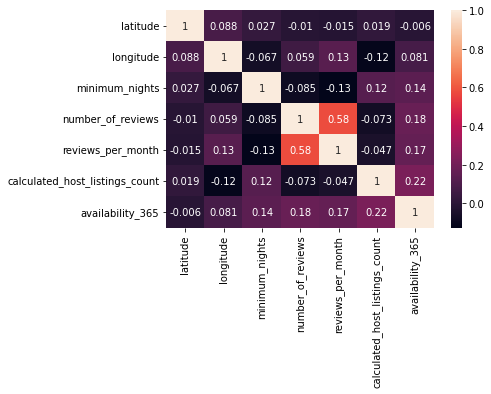

In [50]:
#Correlation matrix
matrix = X_train.corr()
#Plot the correlation matrix with a heatmap
sns.heatmap(matrix, annot=True)
plt.show()

What are the two features that have the biggest correlation in this dataset?

reviews_per_month and number_of_reviews

# Make price binary
We need to turn the price variable from numeric into binary.
Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [51]:
#Function to turn the price variable from numeric into binary
def price_binarization(price):
  if price >= 152:
    return 1
  else:
    return 0

In [52]:
#Applying price_binarization
y_train = y_train.apply(price_binarization)
y_test = y_test.apply(price_binarization)
y_validataion = y_validataion.apply(price_binarization)

# Question 3
* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using round(score, 2)

In [53]:
#Calculate the mutual information score
from sklearn.metrics import mutual_info_score
mutual_info_score(y_train, X_train['neighbourhood_group'])

0.046407892226392196

In [54]:
#Calculate the mutual information score
mutual_info_score(y_train, X_train['room_type'])

0.1425382217595413

# Question 4
* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of  
* Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [55]:
#Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

In [56]:
#Applying DictVectorizer in the trainset
train_dict = X_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train_q4 = dv.transform(train_dict)

In [57]:
#Fit the model on the training dataset.
    #To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    #model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_q4, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [58]:
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
#Transforming X_train categorical data
validation_dict = X_validation.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(validation_dict)
X_validation_q4 = dv.transform(validation_dict)
#Making predictions
y_pred = model.predict(X_validation_q4)


In [59]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_validataion, y_pred),2)

0.79

# Question 5
* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
> * neighbourhood_group
> * room_type
> * number_of_reviews
> * reviews_per_month


note: the difference doesn't have to be positive

In [60]:
# Train a model with all these features (using the same parameters as in Q4).
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_q4, y_train)
y_pred = model.predict(X_validation_q4)
np.round(accuracy_score(y_validataion, y_pred),2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.79

In [61]:
#List of X features
X_features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [62]:
for column in X_features:
  #Preparing X_train set
  X_train_set = X_train.drop([column], axis=1)
  train_dict = X_train_set.to_dict(orient='records')
  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)
  X_train_set = dv.transform(train_dict)

  #Preparing X_validation set
  X_validation_set = X_validation.drop([column], axis=1)
  validation_dict = X_validation_set.to_dict(orient='records')
  dv = DictVectorizer(sparse=False)
  dv.fit(validation_dict)
  X_validation_set = dv.transform(validation_dict)

  #Training logistic regression model
  model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=2000)
  model.fit(X_train_set, y_train)

  #Making predictions 
  y_pred = model.predict(X_validation_set)
  accuracy = np.round(accuracy_score(y_validataion, y_pred),2)
  print('model trained without ', column, 'feature')
  print('accuracy deference ', .79 - accuracy, '\n')
  

model trained without  neighbourhood_group feature
accuracy deference  0.040000000000000036 

model trained without  room_type feature
accuracy deference  0.06000000000000005 

model trained without  latitude feature
accuracy deference  0.0 

model trained without  longitude feature
accuracy deference  0.0 

model trained without  minimum_nights feature
accuracy deference  -0.010000000000000009 

model trained without  number_of_reviews feature
accuracy deference  -0.010000000000000009 

model trained without  reviews_per_month feature
accuracy deference  -0.010000000000000009 

model trained without  calculated_host_listings_count feature
accuracy deference  -0.010000000000000009 

model trained without  availability_365 feature
accuracy deference  0.0 



Which feature has the smallest difference?

number_of_reviews and reviews_per_month

# Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [95]:
#Split data into X and y variables 
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1].values

In [96]:
#We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
y = np.log1p(y)

In [97]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42, shuffle= True)
X_test, X_validation, y_test, y_validataion = train_test_split(X_test, y_test, test_size=.50, random_state=42, shuffle= True)

In [98]:
#Preparing X_train set 
train_dict = X_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)


#Preparing X_validation set
validation_dict = X_validation.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(validation_dict)
X_validation = dv.transform(validation_dict)

In [99]:
#Training a Ridge regression model using [0, 0.01, 0.1, 1, 10] like a alpha values
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alpha_values = [0, 0.01, 0.1, 1, 10]

for alpha_value in alpha_values:
  model = Ridge(alpha= alpha_value)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_validation)
  msr = mean_squared_error(y_validataion, y_pred)
  
  print('model training with alpha', alpha_value, '\n')
  print('mean square error', msr )





model training with alpha 0 

mean square error 0.2422083671959404
model training with alpha 0.01 

mean square error 0.24219330372421957
model training with alpha 0.1 

mean square error 0.242191966605967
model training with alpha 1 

mean square error 0.2421915871959915
model training with alpha 10 

mean square error 0.2428300163454271
